In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from scipy.stats import norm, uniform
import lmdiag
import statsmodels.api as sm

In [2]:
def ols_sim(n, u_sd):  # n=標本の大きさ，　u_sd=誤差項の標準偏差
    
    x = uniform.rvs(1, 10, size=n)  # 説明変数
    u = norm.rvs(scale=u_sd, size=n)  # 誤差項
    y = 1.0 + 0.5*x + u               # 被説明変数
    
    df = pd.DataFrame({'Y':y, 'X':x})  # DataFrame
    
    res = ols(formula='Y ~ X', data=df).fit()  # OLSの計算
    u_standardized = res.get_influence().resid_studentized_internal  # 標準化残差
    
    return x, y, res.fittedvalues, res.resid, u_standardized, res.rsquared  # 返り値の設定

In [3]:
# R^2が高いケース
x_high, y_high, y_fit_high, resid_high, resid_st_high, r2_high = ols_sim(50, 0.5)

# R^2が低いケース
x_low, y_low, y_fit_low, resid_low, resid_st_low, r2_low = ols_sim(50, 1.5)

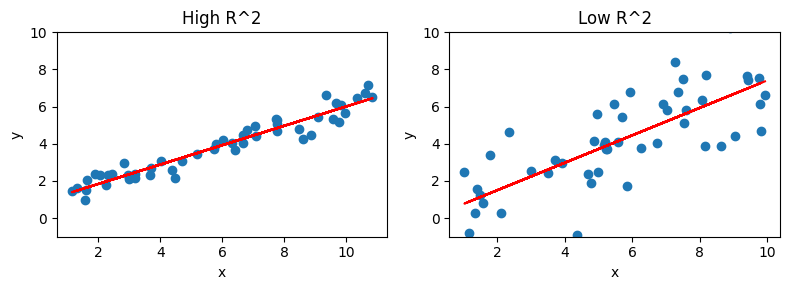

In [4]:
plt.figure(figsize=(8,3))  # figsizeは左右２つの図を合わせた大きさ

# 左の図
plt.subplot(121)
plt.scatter(x_high,y_high)  # 散布図
plt.plot(x_high, y_fit_high,color='red')  # 回帰線
plt.ylim(-1,10)  # 縦軸の表示幅を設定
plt.xlabel('x')  # 横軸のラベル
plt.ylabel('y')  # 縦軸のラベル
plt.title('High R^2')  # タイトル

# 右の図
plt.subplot(122)
plt.scatter(x_low,y_low)
plt.plot(x_low, y_fit_low, color='red')
plt.ylim(-1,10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Low R^2')

plt.tight_layout();  # 左右の間に余裕も持たせる

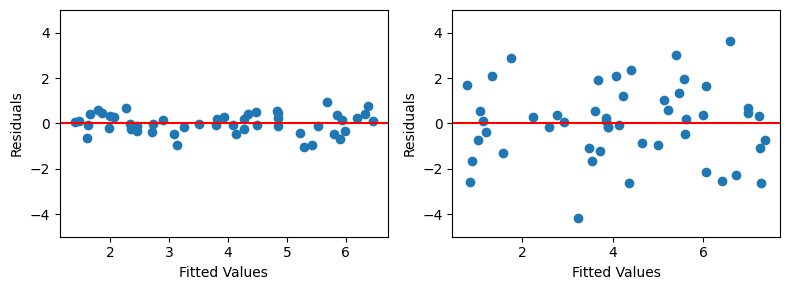

In [5]:
plt.figure(figsize=(8,3))

# 左の図
plt.subplot(121)
plt.scatter(y_fit_high,resid_high)
plt.axhline(y=0, color='red')  # 縦軸の値が0での平行線
plt.ylim(-5,5)  # 縦軸の表示幅を指定
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# 右の図
plt.subplot(122)
plt.scatter(y_fit_low,resid_low)
plt.axhline(y=0, color='red')
plt.ylim(-5,5)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

plt.tight_layout();

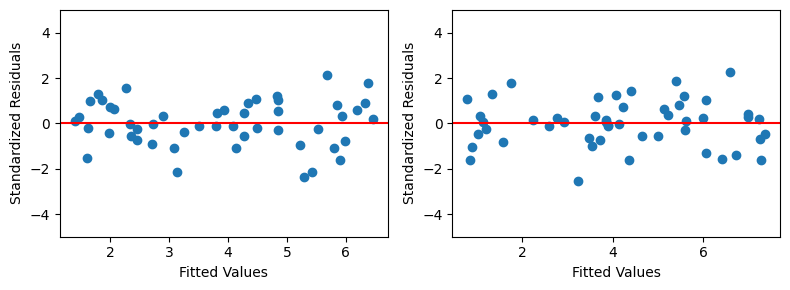

In [6]:
plt.figure(figsize=(8,3))

# 左の図
plt.subplot(121)
plt.scatter(y_fit_high,resid_st_high)
plt.axhline(y=0, color='red')  # 縦軸の値が0での平行線
plt.ylim(-5,5)  # 縦軸の表示幅を指定
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')

# 右の図
plt.subplot(122)
plt.scatter(y_fit_low,resid_st_low)
plt.axhline(y=0, color='red')
plt.ylim(-5,5)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')

plt.tight_layout();

In [15]:
n = 5000  # 標本の大きさ

x = norm.rvs(loc=4, scale=1, size=n)  # 説明変数
u = norm.rvs(size=n)  # 誤差項（標準正規分布）
y = 1 + 0.5*x + u  # 説明変数

df_diag = pd.DataFrame({'Y':y, 'X':x})  # DataFrameの作成

res_diag = ols(formula='Y ~ X', data=df_diag).fit()  # OLS推定

回帰分析結果の「健康状態」を診断する上でこの図は最もよく使われる。この図について以下の点を覚えておこう。

    残差

は観測できない母集団回帰式の誤差項

の推定である。

の予測値は
である。従って，もし残差
と
に何らかの関係があれば，残差
と予測値

の関係に現れる。

GM仮定4を思い出そう。誤差項の条件つき期待値が0

という仮定である。

    この仮定が正しければ，残差

の平均は0あり，図の赤い線は0で横軸と並行になることを意味している。

この仮定が満たされず，説明変数
が何らかの形で
に影響を与えているのであれば，その影響は上の図に現れてくる。（下の「問題がある残差の例」を参照）。

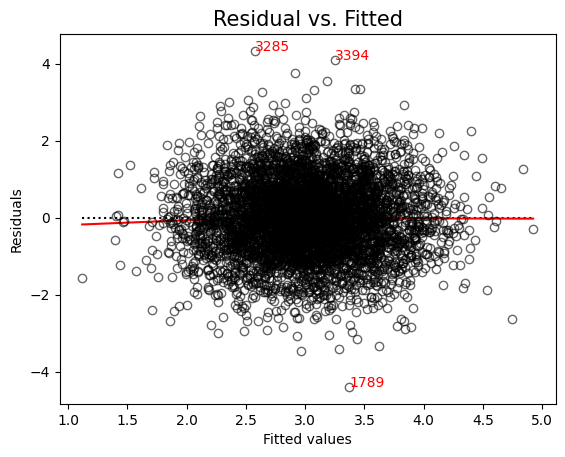

In [16]:
lmdiag.resid_fit(res_diag)
pass

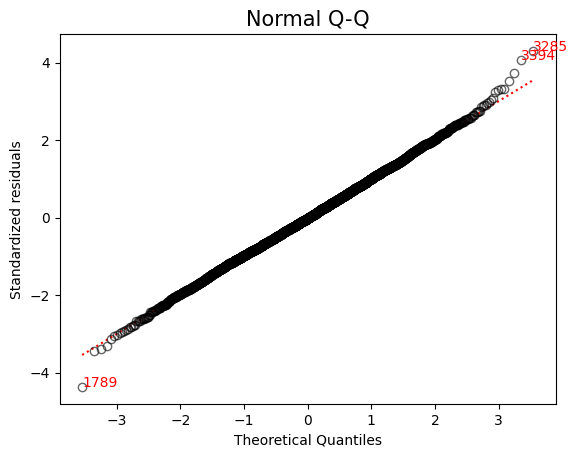

In [17]:
lmdiag.q_q(res_diag)
pass

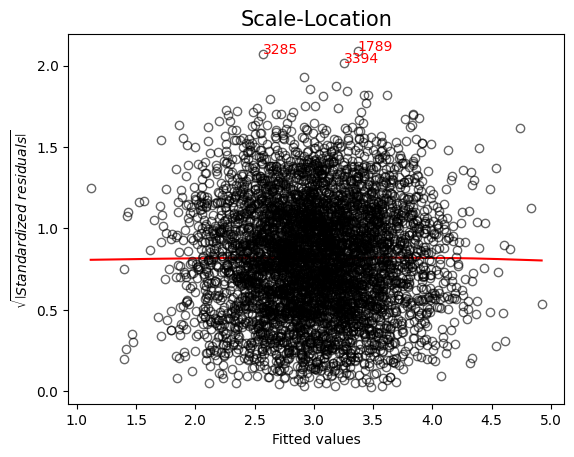

In [18]:
lmdiag.scale_loc(res_diag)
pass

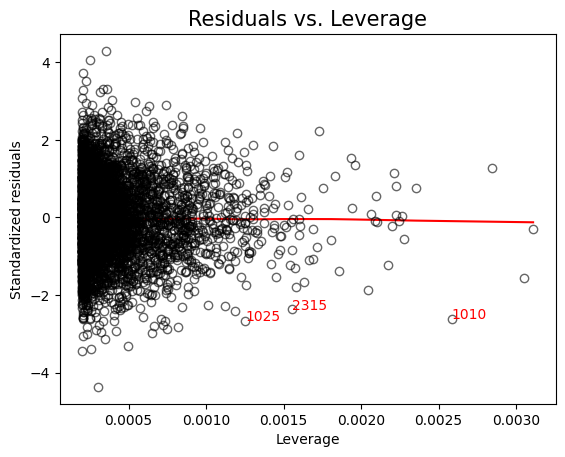

In [19]:
lmdiag.resid_lev(res_diag)
pass

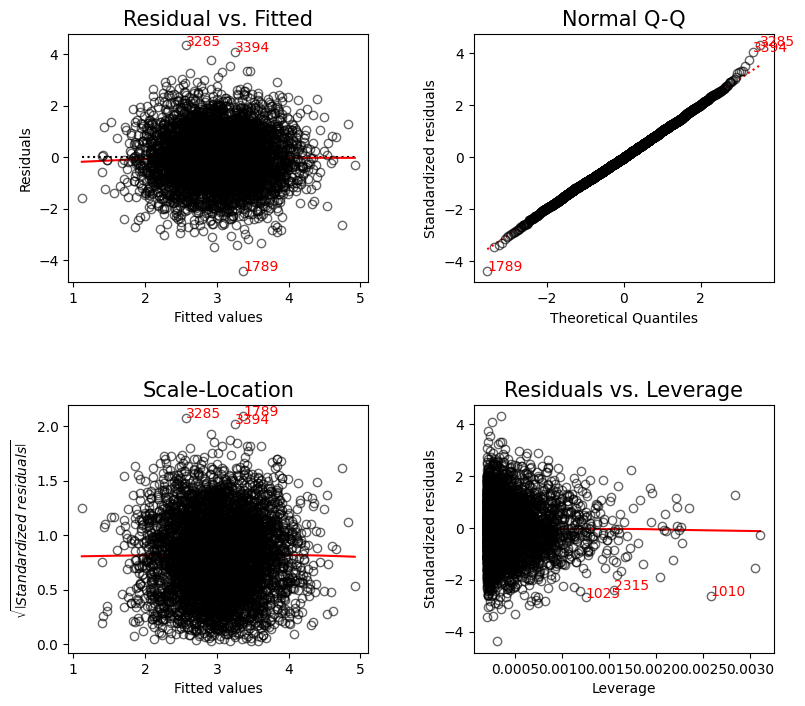

In [20]:
plt.figure(figsize=(8,7))
lmdiag.plot(res_diag)
pass

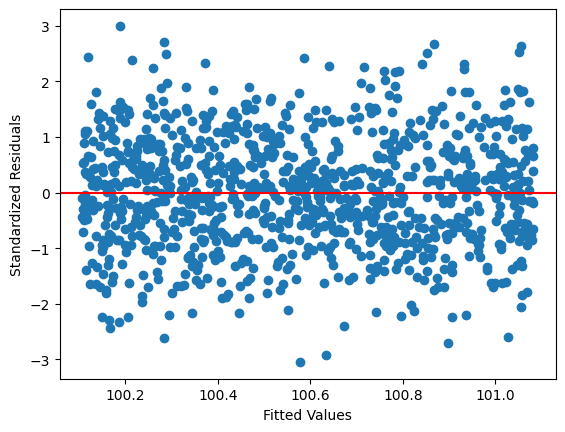

In [31]:
# ケース１：被説明変数の変換が必要な回帰式

n = 1000  # 標本の大きさ

x = uniform.rvs(1, 10, size=n)  # 説明変数
u = norm.rvs(scale=1, size=n)  # 誤差項
y = np.exp(100.0 + .1*x + u)   # 被説明変数

df = pd.DataFrame({'Y':y, 'X':x})  # DataFrame

# res = ols(formula='Y ~ X', data=df).fit()  # OLSの計算

#対応したバージョン　
res = ols(formula='np.log(Y) ~ X', data=df).fit()  # OLSの計算


resid_std = res.get_influence().resid_studentized_internal  # 標準化残差

plt.scatter(res.fittedvalues,resid_std)  # 散布図
plt.axhline(y=0, color='red')          # 赤い平行線
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
pass

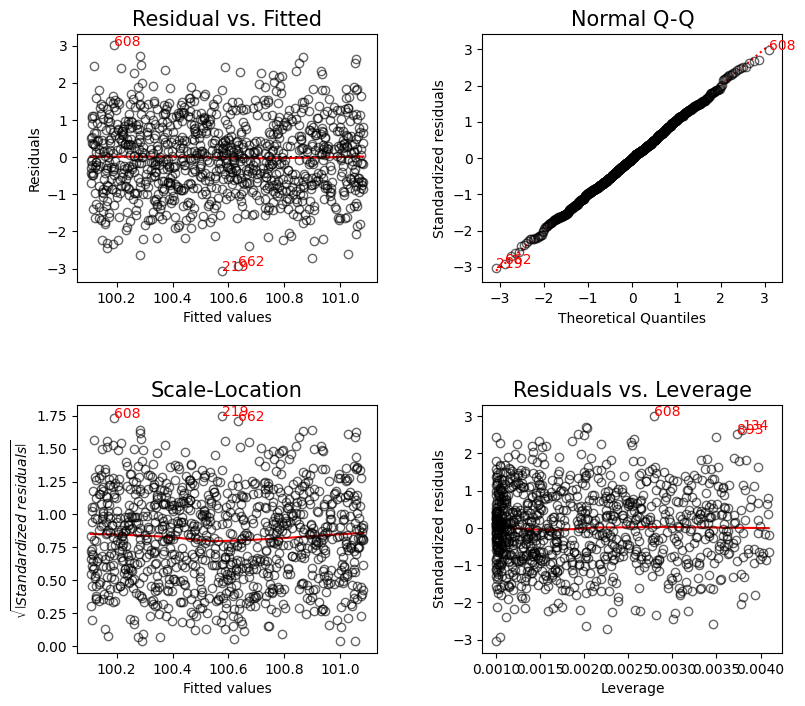

In [32]:
plt.figure(figsize=(8,7))
lmdiag.plot(res)
pass

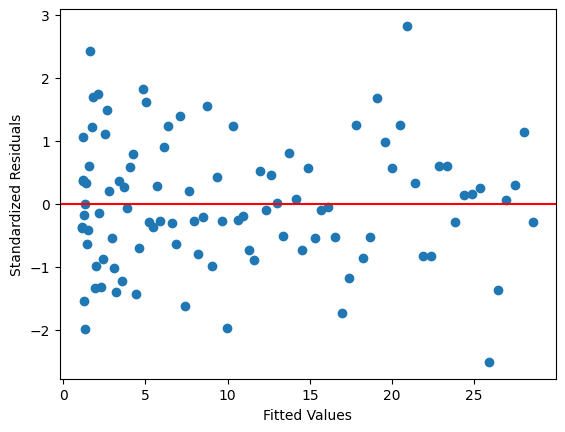

In [25]:
# ケース２：説明変数の２乗項の欠落

n = 100
x = np.linspace(0,16,n)
x2 = x**2
u = norm.rvs(scale=1, size=n)
y = 1.0 + 0.1*x +0.1*x2+ u
df = pd.DataFrame({'Y':y, 'X':x})

# res = ols(formula='Y ~ X', data=df).fit()

#対応したバージョン
res = ols(formula='Y ~ X+ I(X**2)', data=df).fit()

resid_std = res.get_influence().resid_studentized_internal

plt.scatter(res.fittedvalues,resid_std)
plt.axhline(y=0, color='red')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
pass

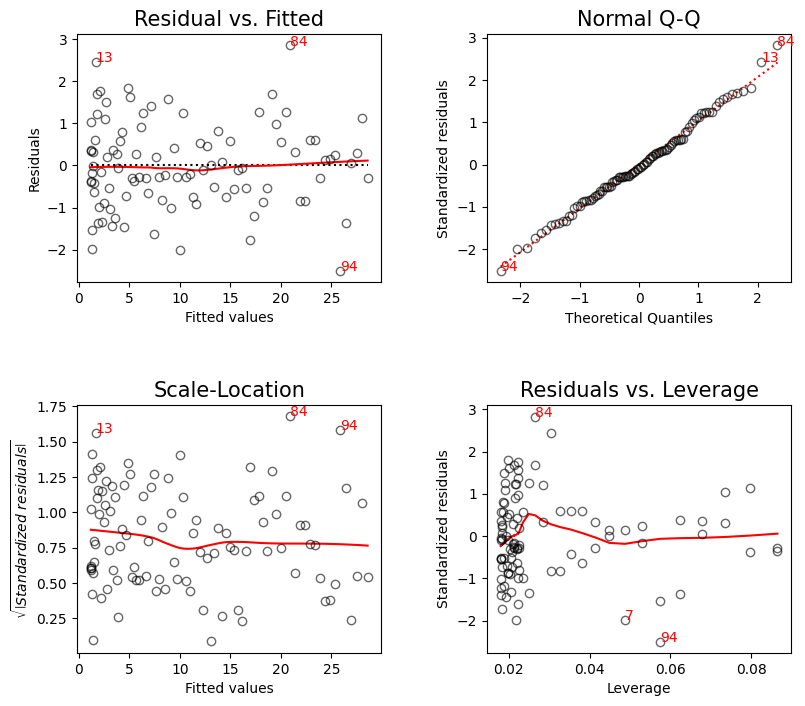

In [26]:
plt.figure(figsize=(8,7))
lmdiag.plot(res)
pass

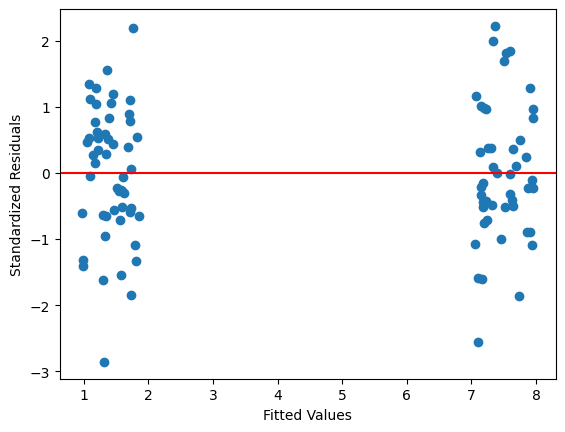

In [35]:

#ケース３：定数項がある条件により変化する場合

n = 100

b0 = np.random.choice([1,7], n, p=[0.5,0.5])
x = uniform.rvs(0,10,size=n)
u = norm.rvs(scale=1, size=n)
y = b0 + 0.1*x + u

# df = pd.DataFrame({'Y':y, 'X':x})
# res = ols(formula='Y ~ X', data=df).fit()

#対応したバージョン
df = pd.DataFrame({'Y':y, 'X':x,'D':b0})

res = ols(formula='Y ~ X +D', data=df).fit()

resid_std = res.get_influence().resid_studentized_internal

plt.scatter(res.fittedvalues,resid_std)
plt.axhline(y=0, color='red')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
pass

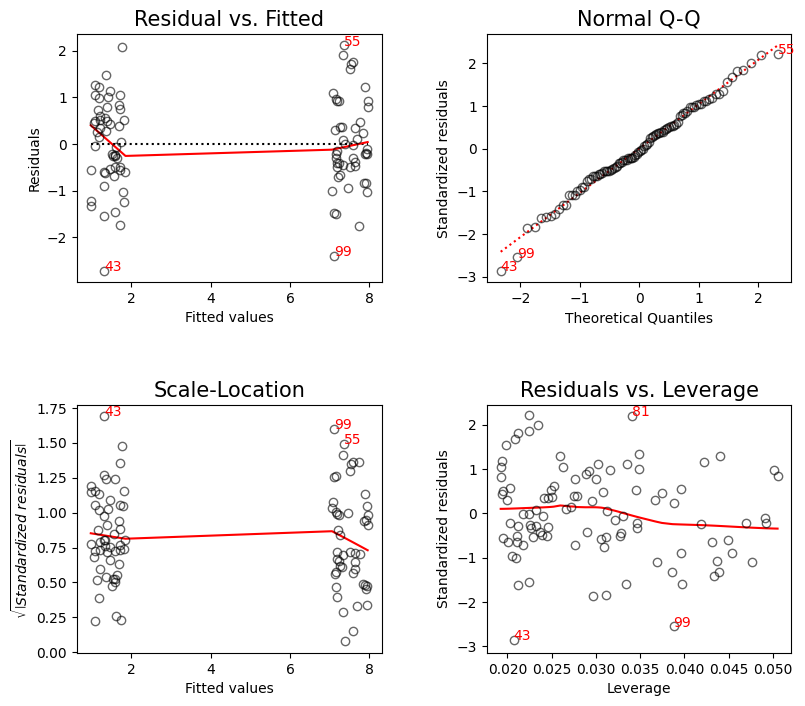

In [36]:
plt.figure(figsize=(8,7))
lmdiag.plot(res)
pass

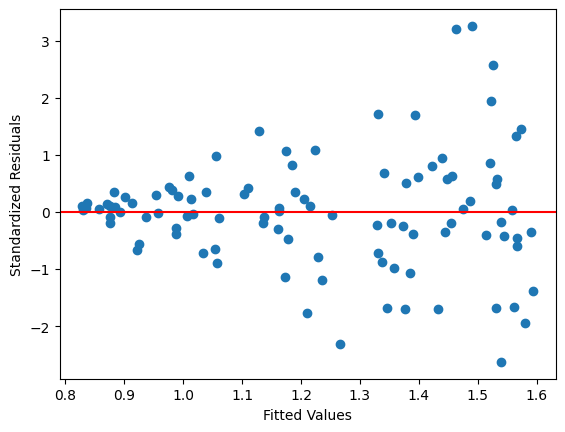

In [37]:
#ケース４：不均一分散

# （解決方法）

#     説明変数を追加し欠落変数をなくす。

#     変数の変換（対数化など）

#     可能な推定方法を試す

#         加重最小二乗法（Weighted Least Squares）

#         操作変数法

#         パネル推定法


n = 100
x = uniform.rvs(0,10,size=n)
u = norm.rvs(scale=1, size=n)
y = 1 + 0.1*x + x**0.6*u
df = pd.DataFrame({'Y':y, 'X':x})

res = ols(formula='Y ~ X', data=df).fit()
resid_std = res.get_influence().resid_studentized_internal

plt.scatter(res.fittedvalues,resid_std)
plt.axhline(y=0, color='red')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
pass

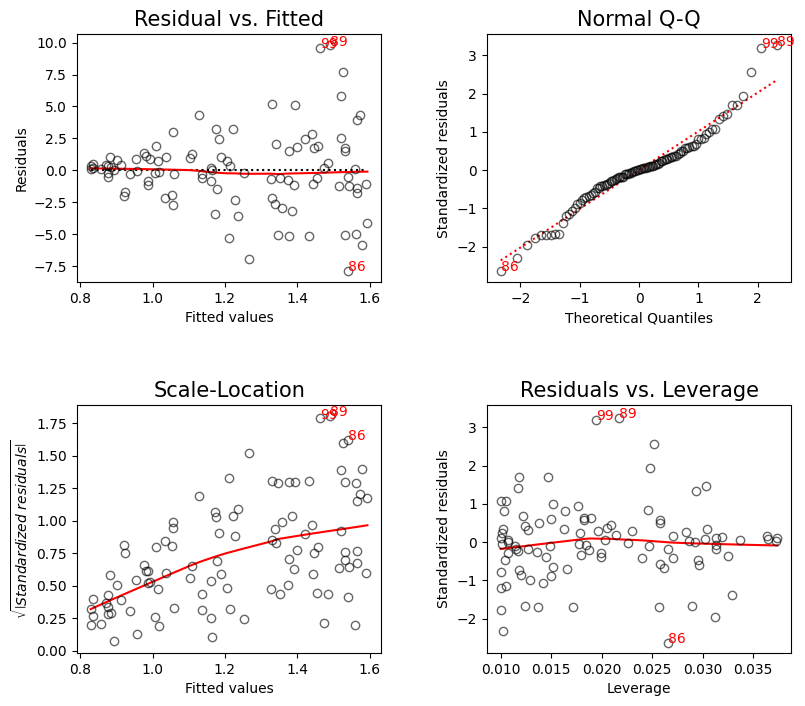

In [38]:
plt.figure(figsize=(8,7))
lmdiag.plot(res)
pass